### Assignment 8 - a simulator that animates the motion of stars, planets, or moons.

In [1]:
import drawSvg as draw

G = 6.67384 * (10**(-11)) # G constant 
AU = 1.49598e11 # number of meters per astronomical unit
EM = 5.9736e24  # mass of the Earth in kilograms

TIME_SCALE = 3.0e6              # how many real seconds for each second of simulation
PIXELS_PER_METER = 120. / AU    # distance scale for the simulation

FRAME_RATE = 30
TIMESTEP = 1.0 / FRAME_RATE     # time between drawing each frame

C:\Users\12062\Anaconda3\lib\site-packages\drawSvg\raster.py:18: RuntimeWarning: Failed to import CairoSVG. drawSvg will be unable to output PNG or other raster image formats. See https://github.com/cduck/drawSvg#prerequisites for more details.
Original OSError: no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e
  warnings.warn(msg, RuntimeWarning)


In [2]:
pip install drawSvg

Note: you may need to restart the kernel to use updated packages.


In [3]:
class Body: # the generic term for a planet. A body has  a mass, a position, a velocity, a radius and RGB color colde.
    def __init__(self, mass, x, y, vx, vy, pixel_radius, r, g, b):
        # initializing values 
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx 
        self.vy = vy
        self.pixel_radius = pixel_radius
        
        # color based on the rgb
        self.r = r
        self.g = g
        self.b = b
        self.color = '#%02x%02x%02x' % (self.r, self.g, self.b)
        

    # set of getter function for mass
    def getMass(self):
        return self.mass
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    # Update the position of the body using vx, vy, and the timestep. 
    def update_position(self, timestep):
        self.x += self.vx * timestep
        self.y += self.vy * timestep
    
    # Update the velocity of the body using ax, ay, and the time step.
    def update_velocity(self, ax, ay, timestep):
        self.vx += ax * timestep
        self.vy += ay * timestep   
    
    # Draw body at it's pixel coordinates
    def draw(self, pixels_per_meter):
        D.append(draw.Circle(self.x * pixels_per_meter, self.y * pixels_per_meter, self.pixel_radius, fill= self.color))


In [4]:
class System: # Each item in the list is a reference to a Body object.
    def __init__(self, body_list):
        
        self.body_list = body_list
        
    # update the velocity and position of each body.
    def update(self, timestep):
        
        # go through the body_list, and call compute_acceleration on each 
        for i in range(len(self.body_list)):
            # grabing the ax and ay value from compute_acceleration function
            ax,ay = self.compute_acceleration(i)
            # update it's position and velocity
            self.body_list[i].update_velocity(ax, ay, timestep)
            self.body_list[i].update_position(timestep)
        
        
    # computes the x and y components of the acceleration of the body at index n in the list.
    def compute_acceleration(self, n):
        # initiate values
        x_n = self.body_list[n].getX()
        y_n = self.body_list[n].getY()
        a = 0 
        a_x = 0
        a_y =0
        
        # go through new_list and compute the a, ax, ay
        for i in range(len(self.body_list)):
            if i != n:
                x_diff = (self.body_list[i].getX() - x_n)
                y_diff = (self.body_list[i].getY() - y_n) 
            
            # caculate the radius
                r = (x_diff**2 + y_diff**2) ** (1/2)     
            
                a += (G * self.body_list[i].getMass()) / (x_diff**2 + y_diff**2)
                a_x += a * x_diff / r
                a_y += a * y_diff / r

            return a_x, a_y
    
    def draw(self, pixels_per_meter): # calls the draw method on each body in the body list
        for i in range(len(self.body_list)):
            self.body_list[i].draw(pixels_per_meter)

In [5]:
D = draw.Drawing(600,600, origin = 'center')
D.append(draw.Rectangle(-300,-300,600,600,fill='black'))

# Solar system data
sun     = Body(1.98892e30, 0, 0, 0, 0, 15, 255, 255, 0)
mercury = Body(.06 * EM, -.3871 * AU, 0, 0, 47890, 3, 255, 102, 0)
venus   = Body(.82 * EM, -.7233 * AU, 0, 0, 35040, 6, 0, 153, 51)
earth   = Body(1.0 * EM, -1.0 * AU, 0, 0, 29790, 7, 0, 102, 255)
mars    = Body(.11 * EM, -1.524 * AU, 0, 0, 24140, 4, 204, 51, 0)
    
solar_system = System([sun, mercury, venus, earth, mars])


In [6]:
def draw_frame():
    solar_system.draw(PIXELS_PER_METER)
    solar_system.update(TIMESTEP * TIME_SCALE)
    return( D )

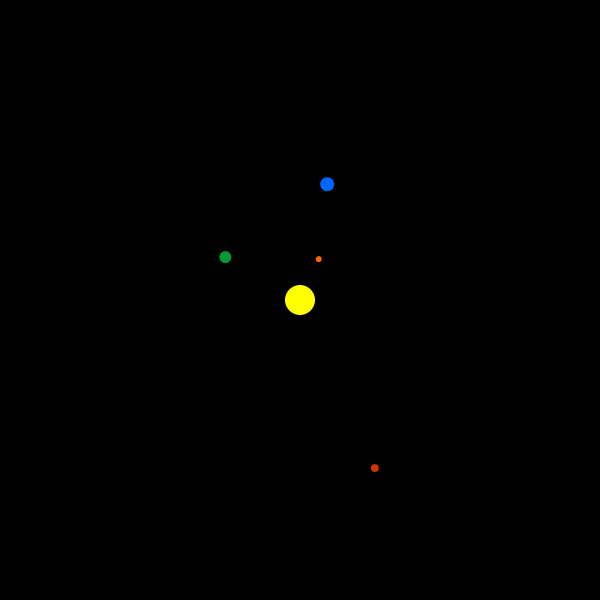

In [ ]:
with draw.animate_jupyter(draw_frame, delay=0.05) as anim:
    while( True ):
        D = draw.Drawing(600, 600, origin='center') # clear canvas
        D.append( draw.Rectangle(-300,-300,600,600,fill='black')) # black background
        anim.draw_frame()